**INTRODUCTION**

The concept of overfitting can be equalized to a porpular phenomenon of our domestic Tailors or cloth designers. One day as it may, a customer who initially asked his tailor for a special suit design visited the said Tailor for his ceremonial suit. In pursuit of customer certisfaction in perfecting the sizing, the Tailor in the cause of measuring the customer, he added 2inches each to the size of the customer. The customer in his curiosity ask the reason for the strange action. The Tailor replied in a relaxed voice; if it is your exact size, the suit will too fit(Overfit) and if shorter the suit will not fit (Underfit). If at a certian range, the suit will be moderate (Fit).

The margin between Overfit and Underfit is a narrow path through the needles hole. Only the sage and the experienced lives their. Overfiting is when model learns and memories both details and noise during training. It is the perfectly fit illustrated in our story. The main effect of this is that it has a negative effect on a new data.

Some of the few methods in solving this methods are:

1. Training with more data

2. Cross-Validation

3. Removal of irrelevant features

4. Early stopping

5. Ensembling

6. Regularization

In this kernel, I will be treating the data provided some of this solving skills. Four models will be practiced and prediction will be made. I will also be during my first NN model here.

I just hope this kernel serves you well and solve some questions in your mind.

Now lets get the ball rolling..............

**Preparing Data for Analysis**

Loading Packages

In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
import datetime
import lightgbm as lgb
from scipy import stats
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score, GridSearchCV, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
import os
from scipy.stats import zscore
from sklearn import metrics
from sklearn.model_selection import KFold
from keras.layers.core import Dense, Activation
import tensorflow as tf
from tensorflow import keras
import keras
from sklearn.datasets import make_moons
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense
from keras import models
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import xgboost as xgb
import lightgbm as lgb
from sklearn import model_selection
from sklearn.metrics import accuracy_score, roc_auc_score
import json
import ast
import time
from sklearn import linear_model
import eli5
from eli5.sklearn import PermutationImportance
import shap
import gc
import itertools
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_selection import GenericUnivariateSelect, SelectPercentile, SelectKBest, f_classif, mutual_info_classif, RFE
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from catboost import CatBoostClassifier

Using TensorFlow backend.


**Loading Data**

We will check the data files that are available and also print its formats. This helps us to know the real data we are working with. The nature of the data and how the data was collated. This is very crucial in for data cleansing and visualisation. The first code below is to access the location of the file and to check for the available file.

The data contains 20000 rows of continues variable and mere handful of training sample (250). This is a problem as it sounds. We will be faced with small sample data that can already cause overfit.

In [2]:
IS_LOCAL = False
if (IS_LOCAL):
    location = "../input/dont-overfit/"
else:
    location = "../input/"
os.listdir(location)

['test.csv', 'train.csv', 'sample_submission.csv']

In [3]:
%%time
train = pd.read_csv(os.path.join(location, 'train.csv'))
test = pd.read_csv(os.path.join(location, 'test.csv'))
sample_submission = pd.read_csv(os.path.join(location, 'sample_submission.csv'))

CPU times: user 1.03 s, sys: 104 ms, total: 1.14 s
Wall time: 1.14 s


I will like to print the shape of the files to know the topography of my data. The train data has 250 rows with 302 features while test data has 19750 rows with 301 features. Their is unbalance and the train data is too small. Let us dig deep into the data.

In [4]:
print("train: {}\ntest: {}".format(train.shape, test.shape))

train: (250, 302)
test: (19750, 301)


**Data Exploration**

Now we can see that the train set has id and target while the test set has the id row. If this two are removed the the data will be equal in features(columns). Also the data are all in variables with no alphabets. We need to go further in checking the missing values and seperating the target as label.

In [5]:
def show_head(data):
    return(data.head())

In [6]:
show_head(train)

,id,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,-2.246,1.825,-0.912,-0.107,0.305,0.102,0.826,0.417,0.177,-0.673,-0.503,1.864,0.410,-1.927,0.102,-0.931,1.763,1.449,-1.097,-0.686,-0.250,-1.859,1.125,1.009,-2.296,0.385,-0.876,1.528,-0.144,-1.078,-0.403,0.005,1.405,-0.044,-0.458,0.579,2.929,0.833,0.761,0.737,0.669,0.717,-1.542,-1.847,-0.445,1.238,-0.840,-1.891,-1.531,-0.396,-0.927,2.072,0.946,-1.105,0.008,0.933,-1.410,-0.770,1.740,-1.504,-0.391,-1.551,-1.415,-0.974,0.796,-2.464,-1.424,1.230,0.219,0.130,-0.371,-0.930,1.851,1.292,-0.380,1.318,1.146,-0.399,2.227,0.447,0.870,1.420,-1.675,0.019,0.060,0.768,2.563,0.638,1.164,0.407,-1.556,-0.903,1.329,0.452,-0.704,2.218,-1.844,0.158,-1.649,-0.172,-1.167,-1.456,-0.778,0.098,-1.627,0.405,-0.082,-0.797,-0.303,0.710,-0.252,1.920,0.706,-0.915,0.267,-0.607,0.966,-0.337,-2.292,-1.366,-1.085,0.278,0.212,1.260,-1.276,-2.013,-1.101,0.797,0.661,1.232,-0.632,-0.805,1.236,-1.085,-0.067,-0.661,-0.745,1.306,-0.010,-0.475,-0.613,-0.841,-0.837,0.671,2.493,0.689,0.946,0.160,-0.607,-0.775,1.688,0.302,-1.156,-0.718,0.126,0.745,-0.287,-0.565,0.646,-0.119,-0.675,-0.479,-0.191,-0.454,1.314,0.740,0.999,1.242,-0.339,0.403,-1.243,1.365,0.030,-0.475,0.860,0.036,1.313,-0.219,1.078,1.880,-0.317,-0.443,1.876,-0.611,0.892,1.435,-0.226,0.311,0.139,-0.075,1.381,1.716,-2.017,-0.485,1.906,-0.119,0.609,-0.564,0.264,-0.604,-0.733,-2.352,-1.661,0.498,-0.841,0.907,-0.476,0.817,1.372,1.187,0.844,0.028,0.029,-0.808,0.253,1.005,1.413,-0.133,0.655,-0.921,0.231,-1.902,-0.005,-1.730,1.132,-0.194,0.039,1.489,-0.328,0.966,-0.057,-0.181,0.723,-0.313,-0.165,-0.803,0.074,-2.851,-1.021,-0.894,0.967,0.218,-0.692,-0.514,0.754,-1.892,0.203,2.174,-0.755,-1.053,-0.516,-1.109,-0.681,1.250,-0.565,-1.318,-0.923,0.075,-0.704,2.457,0.771,-0.460,0.569,-1.320,-1.516,-2.145,-1.120,0.156,0.820,-1.049,-1.125,0.484,0.617,1.253,1.248,0.504,-0.802,-0.896,-1.793,-0.284,-0.601,0.569,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,0.004,-0.291,2.907,1.085,2.144,1.540,0.584,1.133,1.098,-0.237,-0.498,0.283,-1.100,-0.417,1.382,-0.515,-1.519,0.619,-0.128,0.866,-0.540,1.238,-0.227,0.269,-0.390,-2.721,1.659,0.106,-0.121,1.719,0.411,-0.303,-0.307,0.380,0.503,-1.320,0.339,-1.102,-0.947,0.267,0.695,0.167,0.188,-1.082,-0.872,0.660,0.051,0.303,-0.553,-0.771,0.588,0.472,1.315,-0.467,-0.064,1.808,0.633,1.221,1.112,1.133,-0.543,-2.144,0.151,-0.813,1.966,-1.190,0.190,-0.473,0.002,1.195,-0.799,1.117,-0.759,-0.661,0.406,-0.846,-0.035,-1.634,-0.011,0.503,0.610,-1.822,-0.030,1.188,-0.006,-0.279,1.914,0.620,-1.495,1.787,-0.305,0.602,-1.208,0.893,0.379,1.396,0.581,-0.475,-0.056,-0.691,-0.783,-1.485,1.911,-2.400,-2.372,-0.178,1.550,-0.228,0.674,0.987,1.373,-0.373,0.629,0.229,-0.630,-0.175,0.548,0.074,-2.090,-0.625,-1.131,1.111,-0.100,0.574,-0.660,-1.113,0.802,-0.093,1.302,-0.395,0.745,-0.384,0.066,-0.756,0.495,-0.8

In [7]:
show_head(test)

,id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,250,0.500,-1.033,-1.595,0.309,-0.714,0.502,0.535,-0.129,-0.687,1.291,0.507,-0.317,1.848,-0.232,-0.340,-0.051,0.804,0.764,1.860,0.262,1.112,-0.491,-1.039,-0.492,0.183,-0.671,-1.313,0.149,0.244,1.072,-1.003,0.832,-1.075,1.988,1.201,-2.065,-0.826,-0.016,0.490,0.191,0.732,1.235,-0.867,-0.616,0.340,0.788,-0.044,0.305,-0.819,-0.447,-1.625,-1.005,-0.653,-0.371,1.556,0.754,-0.688,0.061,0.644,0.645,-0.222,-2.174,-0.610,-1.092,0.917,-1.010,-1.021,-0.179,1.732,-0.366,-1.694,1.038,-0.721,0.112,-0.783,0.940,-1.803,1.295,-1.031,0.452,1.198,-0.206,0.051,-1.055,1.740,-0.910,-0.509,-0.987,-1.011,0.718,0.375,0.101,0.137,-1.585,0.532,-1.201,1.210,-0.374,0.300,-0.110,-0.248,1.464,0.056,-0.038,-0.482,0.585,-1.263,0.993,-0.639,-1.337,0.225,1.640,-1.807,-1.983,-0.638,-0.432,1.890,0.506,1.091,-0.635,1.072,0.262,0.418,-1.294,0.868,0.728,0.618,0.540,1.981,-0.246,0.516,-0.373,0.954,-0.854,-1.241,-0.861,0.317,-0.611,-0.179,-1.658,-1.397,-0.988,-0.316,1.808,0.930,1.098,0.997,0.901,1.095,-0.464,2.592,0.846,1.060,-0.676,0.376,0.047,1.265,1.218,1.003,1.219,-0.624,-1.316,0.921,3.472,-1.123,0.037,0.927,-0.695,-0.046,0.270,0.847,-1.072,0.315,2.522,0.376,-0.015,-1.283,-0.650,-0.106,0.747,0.612,-0.838,0.713,0.048,-1.073,0.657,-0.542,-0.269,-0.482,0.329,0.534,0.337,0.118,-0.164,-0.538,-0.285,1.375,1.194,-0.258,-0.298,1.578,-0.488,1.424,1.106,0.363,-2.007,-0.091,0.551,0.388,0.422,0.099,0.378,-1.333,-1.102,2.145,0.745,0.345,-0.904,0.425,-0.273,0.547,-0.184,0.458,0.182,0.592,0.966,0.540,-1.382,0.069,0.131,-0.068,-0.400,0.413,-0.030,0.890,1.000,-0.774,0.340,2.345,2.748,0.774,-0.355,0.574,0.027,1.437,-0.877,0.532,-0.348,0.926,1.308,-0.120,-1.460,0.755,0.426,1.667,-0.264,1.266,0.962,1.285,1.176,0.824,0.928,1.372,1.505,0.645,0.641,-1.132,1.009,0.998,0.210,-1.634,1.046,0.114,-0.806,0.301,0.145,-0.684,0.794,-0.290,-1.688,0.313,1.140,0.447,-0.616,1.294,0.785,0.453,1.550,-0.866,1.007,-0.088,-2.628,-0.845,2.078,-0.277,2.132,0.609,-0.104,0.312,0.979
1,251,0.776,0.914,-0.494,1.347,-0.867,0.480,0.578,-0.313,0.203,1.356,-1.086,0.322,0.876,-0.563,-1.394,0.385,1.891,-2.107,-0.636,-0.055,-0.843,0.041,0.253,0.557,0.475,-0.839,-1.146,1.210,1.427,0.347,1.077,-0.194,0.323,0.543,0.894,1.190,0.342,-0.858,0.756,1.350,-0.414,0.748,2.014,0.858,0.025,1.343,0.784,-0.418,-0.515,0.694,-1.097,0.559,-0.799,-0.936,1.483,1.670,1.403,0.457,-1.564,0.049,0.550,-0.085,-0.561,-0.529,-1.563,-0.781,-0.532,0.375,-0.727,-0.053,-0.383,-0.123,1.573,-0.898,-0.070,0.811,-0.036,0.720,1.691,-0.673,-0.421,-1.665,0.099,0.089,2.032,-1.132,-1.827,-0.017,-1.748,-0.717,2.004,1.216,1.547,1.322,0.481,1.819,-0.809,0.617,-0.763,-0.154,-0.847,-0.981,0.274,-1.856,0.808,-0.599,0.998,-0.286,0.649,0.612,-1.002,1.258,0.149,0.252,1.093,-0.344,0.349,-1.386,-0.518,1.478,-1.261,2.206,-0.053,-1.191,-1.118,0.402,0.786,-0.345,-0.387,0.558,2.202,-2.056,1.502,1.191,-0.404,-2.183,1.559,1.077,-0.659,0.339,1.113,0.286,-0.424,-1.061,-0.748,-1.148,1.705,1.239,-0.912,-0

I will create a function to check missing variables and also to show the type of variables. I noticed that theirs is no missing values and the variables are all floats.

In [8]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (total/data.isnull().count()*100)
    miss_column = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    miss_column['Types'] = types
    return(np.transpose(miss_column)) 

In [9]:
missing_data(train)

,id,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
Total,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Types,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,f

In [10]:
missing_data(test)

,id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
Total,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Types,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,floa

 I will now creat a function called describe_data, this will describe our data. We will know waht exactly the problem is in this function. this function will show us the mean, std, counts and max and min of each measurement. it seems the measurement are categorised into series.

In [11]:
def describe_data(data):
    return(data.describe())

In [12]:
describe_data(train)

,id,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.00000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.00000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.00000,250.00000,250.000000,250.000000,250.000000,250.000000,250.00000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.0

In [13]:
describe_data(test)

,id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
count,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,19750.000000,1

I will now seperate the Label data and find the type of classification we are dealing with.

From the code below, we noticed that the target is a binary target with some level of unbalance. The columns are more similar

In [15]:
label = train['target']
train = train.drop(['id', 'target'], axis=1)
test = test.drop(['id'], axis=1)

KeyError: 'target'

In [16]:
label_count = label.value_counts().reset_index().rename(columns = {'index' : 'Labels'})
label_count

,Labels,target
0,1.0,160
1,0.0,90


This shows that we are dealing with an unbalance data set. The data for training is samll and unbalance.

In [17]:
show_head(train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,-2.246,1.825,-0.912,-0.107,0.305,0.102,0.826,0.417,0.177,-0.673,-0.503,1.864,0.410,-1.927,0.102,-0.931,1.763,1.449,-1.097,-0.686,-0.250,-1.859,1.125,1.009,-2.296,0.385,-0.876,1.528,-0.144,-1.078,-0.403,0.005,1.405,-0.044,-0.458,0.579,2.929,0.833,0.761,0.737,0.669,0.717,-1.542,-1.847,-0.445,1.238,-0.840,-1.891,-1.531,-0.396,-0.927,2.072,0.946,-1.105,0.008,0.933,-1.410,-0.770,1.740,-1.504,-0.391,-1.551,-1.415,-0.974,0.796,-2.464,-1.424,1.230,0.219,0.130,-0.371,-0.930,1.851,1.292,-0.380,1.318,1.146,-0.399,2.227,0.447,0.870,1.420,-1.675,0.019,0.060,0.768,2.563,0.638,1.164,0.407,-1.556,-0.903,1.329,0.452,-0.704,2.218,-1.844,0.158,-1.649,-0.172,-1.167,-1.456,-0.778,0.098,-1.627,0.405,-0.082,-0.797,-0.303,0.710,-0.252,1.920,0.706,-0.915,0.267,-0.607,0.966,-0.337,-2.292,-1.366,-1.085,0.278,0.212,1.260,-1.276,-2.013,-1.101,0.797,0.661,1.232,-0.632,-0.805,1.236,-1.085,-0.067,-0.661,-0.745,1.306,-0.010,-0.475,-0.613,-0.841,-0.837,0.671,2.493,0.689,0.946,0.160,-0.607,-0.775,1.688,0.302,-1.156,-0.718,0.126,0.745,-0.287,-0.565,0.646,-0.119,-0.675,-0.479,-0.191,-0.454,1.314,0.740,0.999,1.242,-0.339,0.403,-1.243,1.365,0.030,-0.475,0.860,0.036,1.313,-0.219,1.078,1.880,-0.317,-0.443,1.876,-0.611,0.892,1.435,-0.226,0.311,0.139,-0.075,1.381,1.716,-2.017,-0.485,1.906,-0.119,0.609,-0.564,0.264,-0.604,-0.733,-2.352,-1.661,0.498,-0.841,0.907,-0.476,0.817,1.372,1.187,0.844,0.028,0.029,-0.808,0.253,1.005,1.413,-0.133,0.655,-0.921,0.231,-1.902,-0.005,-1.730,1.132,-0.194,0.039,1.489,-0.328,0.966,-0.057,-0.181,0.723,-0.313,-0.165,-0.803,0.074,-2.851,-1.021,-0.894,0.967,0.218,-0.692,-0.514,0.754,-1.892,0.203,2.174,-0.755,-1.053,-0.516,-1.109,-0.681,1.250,-0.565,-1.318,-0.923,0.075,-0.704,2.457,0.771,-0.460,0.569,-1.320,-1.516,-2.145,-1.120,0.156,0.820,-1.049,-1.125,0.484,0.617,1.253,1.248,0.504,-0.802,-0.896,-1.793,-0.284,-0.601,0.569,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,0.004,-0.291,2.907,1.085,2.144,1.540,0.584,1.133,1.098,-0.237,-0.498,0.283,-1.100,-0.417,1.382,-0.515,-1.519,0.619,-0.128,0.866,-0.540,1.238,-0.227,0.269,-0.390,-2.721,1.659,0.106,-0.121,1.719,0.411,-0.303,-0.307,0.380,0.503,-1.320,0.339,-1.102,-0.947,0.267,0.695,0.167,0.188,-1.082,-0.872,0.660,0.051,0.303,-0.553,-0.771,0.588,0.472,1.315,-0.467,-0.064,1.808,0.633,1.221,1.112,1.133,-0.543,-2.144,0.151,-0.813,1.966,-1.190,0.190,-0.473,0.002,1.195,-0.799,1.117,-0.759,-0.661,0.406,-0.846,-0.035,-1.634,-0.011,0.503,0.610,-1.822,-0.030,1.188,-0.006,-0.279,1.914,0.620,-1.495,1.787,-0.305,0.602,-1.208,0.893,0.379,1.396,0.581,-0.475,-0.056,-0.691,-0.783,-1.485,1.911,-2.400,-2.372,-0.178,1.550,-0.228,0.674,0.987,1.373,-0.373,0.629,0.229,-0.630,-0.175,0.548,0.074,-2.090,-0.625,-1.131,1.111,-0.100,0.574,-0.660,-1.113,0.802,-0.093,1.302,-0.395,0.745,-0.384,0.066,-0.756,0.495,-0.822,0.135,0.883,0.211,-

In [18]:
show_head(label)

0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: target, dtype: float64

I will briefly show the density plot of the columns to have a better understanding on how the columns are distributed.

All the columns are normally distributed with a shape peak.

I will like to reduce the dimmension of my data to ease visualization. I will be using principal component anaalysis to achieve this. PCA is essentially a method that reduces the dimention of the feature space in such a way that new variables are orthogonal to each other.

To use PCA, we need to apply scale standard to unitarilize our units of dimention.

I will first plot a PCA graph to determine the number of components we need in apply PCA. This plot tells us that selecting 205 components we will preserve something around 96 percent of the total variance of the data. Not using all the component  makes us to use only the principle ones. I will now go forward by using the components suggested for me by PCA. 

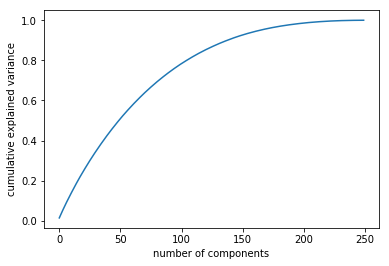

In [19]:
sc = StandardScaler()
xtrain = sc.fit_transform(train)
xtest = sc.transform(test)

pca = PCA().fit(xtrain)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [20]:
print("xtrain: {}\nxtest: {}\nlabel: {}".format(xtrain.shape, xtest.shape, label.shape))

xtrain: (250, 300)
xtest: (19750, 300)
label: (250,)


In [21]:
missing_data(train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
Total,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Types,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,f

Now we will use Kfold cross validation to compare with our leave one out cross validation

**RandomForestClassifier with KFold cross validation**

In [23]:
from sklearn.metrics import classification_report as c_report
from sklearn.metrics import confusion_matrix as c_matrix
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=4422)
forcast_rfc2 = np.zeros(len(xtest))
validation_pred_rfc2 = np.zeros(len(xtrain))
scores_rfc2 = []
valid_rfc2 = np.zeros(len(label))
for fold_, (xtrn_indx, xvad_indx) in enumerate(folds.split(xtrain, label)):
    print('Fold {}, started at {}'.format(fold_, time.ctime()))
    x_train, x_valid = xtrain[xtrn_indx], xtrain[xvad_indx]
    y_train, y_valid = label[xtrn_indx], label[xvad_indx]
    
    clf_rfc2 = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=0)
    clf_rfc2.fit(x_train, y_train)
    pred_valid = clf_rfc2.predict(x_valid).reshape(-1,)
    score = accuracy_score(y_valid, pred_valid)
    Pred_Real = clf_rfc2.predict_proba(xtest)[:, 1]
    
    validation_pred_rfc2[xvad_indx] += (pred_valid).reshape(-1,)
    scores_rfc2.append(accuracy_score(y_valid, pred_valid))
    forcast_rfc2 += Pred_Real
    valid_rfc2[xvad_indx] += (y_valid)

print(c_report(valid_rfc2[xvad_indx], validation_pred_rfc2[xvad_indx]))
print(c_matrix(valid_rfc2[xvad_indx], validation_pred_rfc2[xvad_indx]))
print('accuracy is: {}, std: {}.'.format(np.mean(scores_rfc2), np.std(scores_rfc2)))

Fold 0, started at Sat Apr  6 11:50:44 2019
Fold 1, started at Sat Apr  6 11:50:48 2019
Fold 2, started at Sat Apr  6 11:50:51 2019
Fold 3, started at Sat Apr  6 11:50:54 2019
Fold 4, started at Sat Apr  6 11:50:57 2019
Fold 5, started at Sat Apr  6 11:51:00 2019
Fold 6, started at Sat Apr  6 11:51:03 2019
Fold 7, started at Sat Apr  6 11:51:06 2019
Fold 8, started at Sat Apr  6 11:51:09 2019
Fold 9, started at Sat Apr  6 11:51:13 2019
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         9
         1.0       0.64      1.00      0.78        16

   micro avg       0.64      0.64      0.64        25
   macro avg       0.32      0.50      0.39        25
weighted avg       0.41      0.64      0.50        25

[[ 0  9]
 [ 0 16]]
accuracy is: 0.6479999999999999, std: 0.016000000000000014.


**DecisionTreeClassifier**

In [24]:
from sklearn.tree import DecisionTreeClassifier
forcast_dtc2 = np.zeros(len(xtest))
validation_pred_dtc2 = np.zeros(len(xtrain))
scores_dtc2 = []
valid_dtc2 = np.zeros(len(label))
for fold_, (xtrn_indx, xvad_indx) in enumerate(folds.split(xtrain, label)):
    print('Fold {}, started at {}'.format(fold_, time.ctime()))
    x_train, x_valid = xtrain[xtrn_indx], xtrain[xvad_indx]
    y_train, y_valid = label[xtrn_indx], label[xvad_indx]
    
    clf_dtc2 = DecisionTreeClassifier()
    clf_dtc2.fit(x_train, y_train)
    pred_valid = clf_dtc2.predict(x_valid).reshape(-1,)
    score = accuracy_score(y_valid, pred_valid)
    Pred_Real = clf_dtc2.predict_proba(xtest)[:, 1]
    
    validation_pred_dtc2[xvad_indx] += (pred_valid).reshape(-1,)
    scores_dtc2.append(accuracy_score(y_valid, pred_valid))
    forcast_dtc2 += Pred_Real
    valid_dtc2[xvad_indx] += (y_valid)

print(c_report(valid_dtc2[xvad_indx], validation_pred_dtc2[xvad_indx]))
print(c_matrix(valid_dtc2[xvad_indx], validation_pred_dtc2[xvad_indx]))
print('accuracy is: {}, std: {}.'.format(np.mean(scores_dtc2), np.std(scores_dtc2)))

Fold 0, started at Sat Apr  6 11:51:22 2019
Fold 1, started at Sat Apr  6 11:51:22 2019
Fold 2, started at Sat Apr  6 11:51:22 2019
Fold 3, started at Sat Apr  6 11:51:22 2019
Fold 4, started at Sat Apr  6 11:51:22 2019
Fold 5, started at Sat Apr  6 11:51:22 2019
Fold 6, started at Sat Apr  6 11:51:22 2019
Fold 7, started at Sat Apr  6 11:51:22 2019
Fold 8, started at Sat Apr  6 11:51:22 2019
Fold 9, started at Sat Apr  6 11:51:22 2019
              precision    recall  f1-score   support

         0.0       0.33      0.11      0.17         9
         1.0       0.64      0.88      0.74        16

   micro avg       0.60      0.60      0.60        25
   macro avg       0.48      0.49      0.45        25
weighted avg       0.53      0.60      0.53        25

[[ 1  8]
 [ 2 14]]
accuracy is: 0.588, std: 0.09474175425861608.


**svm**

In [25]:
from sklearn import svm
forcast_svm2 = np.zeros(len(xtest))
validation_pred_svm2 = np.zeros(len(xtrain))
scores_svm2 = []
valid_svm2 = np.zeros(len(label))
for fold_, (xtrn_indx, xvad_indx) in enumerate(folds.split(xtrain, label)):
    print('Fold {}, started at {}'.format(fold_, time.ctime()))
    x_train, x_valid = xtrain[xtrn_indx], xtrain[xvad_indx]
    y_train, y_valid = label[xtrn_indx], label[xvad_indx]
    
    clf_svm2 = svm.SVC(kernel='linear', gamma=1)
    clf_svm2.fit(x_train, y_train)
    pred_valid = clf_svm2.predict(x_valid).reshape(-1,)
    score = accuracy_score(y_valid, pred_valid)
    Pred_Real = clf_svm2.predict(xtest)
    
    validation_pred_svm2[xvad_indx] += (pred_valid).reshape(-1,)
    scores_svm2.append(accuracy_score(y_valid, pred_valid))
    forcast_svm2 += Pred_Real
    valid_svm2[xvad_indx] += (y_valid)

print(c_report(valid_svm2[xvad_indx], validation_pred_svm2[xvad_indx]))
print(c_matrix(valid_svm2[xvad_indx], validation_pred_svm2[xvad_indx]))
print('accuracy is: {}, std: {}.'.format(np.mean(scores_svm2), np.std(scores_svm2)))

Fold 0, started at Sat Apr  6 11:51:33 2019
Fold 1, started at Sat Apr  6 11:51:35 2019
Fold 2, started at Sat Apr  6 11:51:36 2019
Fold 3, started at Sat Apr  6 11:51:38 2019
Fold 4, started at Sat Apr  6 11:51:39 2019
Fold 5, started at Sat Apr  6 11:51:41 2019
Fold 6, started at Sat Apr  6 11:51:42 2019
Fold 7, started at Sat Apr  6 11:51:43 2019
Fold 8, started at Sat Apr  6 11:51:45 2019
Fold 9, started at Sat Apr  6 11:51:46 2019
              precision    recall  f1-score   support

         0.0       0.55      0.67      0.60         9
         1.0       0.79      0.69      0.73        16

   micro avg       0.68      0.68      0.68        25
   macro avg       0.67      0.68      0.67        25
weighted avg       0.70      0.68      0.69        25

[[ 6  3]
 [ 5 11]]
accuracy is: 0.6799999999999999, std: 0.0644980619863884.


**LogisticRegression**

In [26]:
forcast_lr2 = np.zeros(len(xtest))
validation_pred_lr2 = np.zeros(len(xtrain))
scores_lr2 = []
valid_lr2 = np.zeros(len(label))
for fold_, (xtrn_indx, xvad_indx) in enumerate(folds.split(xtrain, label)):
    print('Fold {}, started at {}'.format(fold_, time.ctime()))
    x_train, x_valid = xtrain[xtrn_indx], xtrain[xvad_indx]
    y_train, y_valid = label[xtrn_indx], label[xvad_indx]
    
    clf_lr2 = linear_model.LogisticRegression(class_weight='balanced', penalty='l1', C=0.1, solver='liblinear')
    clf_lr2.fit(x_train, y_train)
    pred_valid = clf_lr2.predict(x_valid).reshape(-1,)
    score = accuracy_score(y_valid, pred_valid)
    Pred_Real = clf_lr2.predict_proba(xtest)[:, 1]
    
    validation_pred_lr2[xvad_indx] += (pred_valid).reshape(-1,)
    scores_lr2.append(accuracy_score(y_valid, pred_valid))
    forcast_lr2 += Pred_Real
    valid_lr2[xvad_indx] += (y_valid)

print(c_report(valid_lr2[xvad_indx], validation_pred_lr2[xvad_indx]))
print(c_matrix(valid_lr2[xvad_indx], validation_pred_lr2[xvad_indx]))
print('accuracy is: {}, std: {}.'.format(np.mean(scores_lr2), np.std(scores_lr2)))

Fold 0, started at Sat Apr  6 11:51:56 2019
Fold 1, started at Sat Apr  6 11:51:57 2019
Fold 2, started at Sat Apr  6 11:51:57 2019
Fold 3, started at Sat Apr  6 11:51:57 2019
Fold 4, started at Sat Apr  6 11:51:57 2019
Fold 5, started at Sat Apr  6 11:51:57 2019
Fold 6, started at Sat Apr  6 11:51:57 2019
Fold 7, started at Sat Apr  6 11:51:57 2019
Fold 8, started at Sat Apr  6 11:51:57 2019
Fold 9, started at Sat Apr  6 11:51:57 2019
              precision    recall  f1-score   support

         0.0       0.54      0.78      0.64         9
         1.0       0.83      0.62      0.71        16

   micro avg       0.68      0.68      0.68        25
   macro avg       0.69      0.70      0.68        25
weighted avg       0.73      0.68      0.69        25

[[ 7  2]
 [ 6 10]]
accuracy is: 0.708, std: 0.08953211714239756.


Using ELI5 and permutation importance helps us to know how weights are been ascribed to each features in this Lr model.
The code below shows the feature importance of the model.

The first is using elif while the second is using permutation importance.

In [27]:
perm = PermutationImportance(clf_lr2, random_state=1).fit(xtrain, label)
eli5.show_weights(perm, top=50)

Weight,Feature
0.1360 ± 0.0535,x33
0.0688 ± 0.0305,x65
0.0464 ± 0.0109,x91
0.0456 ± 0.0298,x217
0.0248 ± 0.0171,x199
0.0240 ± 0.0221,x133
0.0232 ± 0.0199,x101
0.0232 ± 0.0106,x117
0.0208 ± 0.0138,x295
0.0200 ± 0.0101,x189


We quickly checked the features with non zero weight. 38 features has weight from all the features.

In [28]:
(clf_lr2.coef_ != 0).sum()

38

We will now use the top features with great importance to train our model and also to predict to see the diffence with the former moddel.

In [29]:
top_features = [i[1:] for i in eli5.formatters.as_dataframe.explain_weights_df(clf_lr2).feature if 'BIAS' not in i]
xtrain_lr_elif = train[top_features]
xtest_lr_elif = test[top_features]
scaler = StandardScaler()
xtrain_lr_elif = scaler.fit_transform(xtrain_lr_elif)
xtest_lr_elif = scaler.transform(xtest_lr_elif)

forcast_lr4 = np.zeros(len(xtest_lr_elif))
validation_pred_lr4 = np.zeros(len(xtrain_lr_elif))
scores_lr4 = []
valid_lr4 = np.zeros(len(label))
for fold_, (xtrn_indx, xvad_indx) in enumerate(folds.split(xtrain_lr_elif, label)):
    print('Fold {}, started at {}'.format(fold_, time.ctime()))
    x_train, x_valid = xtrain_lr_elif[xtrn_indx], xtrain_lr_elif[xvad_indx]
    y_train, y_valid = label[xtrn_indx], label[xvad_indx]
    
    clf_lr4 = linear_model.LogisticRegression(class_weight='balanced', penalty='l1', C=0.1, solver='liblinear')
    clf_lr4.fit(x_train, y_train)
    pred_valid = clf_lr4.predict(x_valid).reshape(-1,)
    score = accuracy_score(y_valid, pred_valid)
    Pred_Real = clf_lr4.predict_proba(xtest_lr_elif)[:, 1]
    
    validation_pred_lr4[xvad_indx] += (pred_valid).reshape(-1,)
    scores_lr4.append(accuracy_score(y_valid, pred_valid))
    forcast_lr4 += Pred_Real
    valid_lr4[xvad_indx] += (y_valid)

print(c_report(valid_lr4[xvad_indx], validation_pred_lr4[xvad_indx]))
print(c_matrix(valid_lr4[xvad_indx], validation_pred_lr4[xvad_indx]))
print('accuracy is: {}, std: {}.'.format(np.mean(scores_lr4), np.std(scores_lr4)))

Fold 0, started at Sat Apr  6 11:52:18 2019
Fold 1, started at Sat Apr  6 11:52:18 2019
Fold 2, started at Sat Apr  6 11:52:18 2019
Fold 3, started at Sat Apr  6 11:52:18 2019
Fold 4, started at Sat Apr  6 11:52:18 2019
Fold 5, started at Sat Apr  6 11:52:18 2019
Fold 6, started at Sat Apr  6 11:52:18 2019
Fold 7, started at Sat Apr  6 11:52:18 2019
Fold 8, started at Sat Apr  6 11:52:18 2019
Fold 9, started at Sat Apr  6 11:52:18 2019
              precision    recall  f1-score   support

         0.0       0.54      0.78      0.64         9
         1.0       0.83      0.62      0.71        16

   micro avg       0.68      0.68      0.68        25
   macro avg       0.69      0.70      0.68        25
weighted avg       0.73      0.68      0.69        25

[[ 7  2]
 [ 6 10]]
accuracy is: 0.74, std: 0.10469001862641919.


wow we have an increase in the score of the model from 0.708 to 0.74 by using the model to explain the weight......this is a good improvement but yet we need to check on the leaderboard.

Now let us try permutation importance to explain the weight.

In [30]:
perm = PermutationImportance(clf_lr2, random_state=1).fit(xtrain, label)
eli5.show_weights(perm, top=50)

Weight,Feature
0.1360 ± 0.0535,x33
0.0688 ± 0.0305,x65
0.0464 ± 0.0109,x91
0.0456 ± 0.0298,x217
0.0248 ± 0.0171,x199
0.0240 ± 0.0221,x133
0.0232 ± 0.0199,x101
0.0232 ± 0.0106,x117
0.0208 ± 0.0138,x295
0.0200 ± 0.0101,x189


In [32]:
top_features = [i[1:] for i in eli5.formatters.as_dataframe.explain_weights_df(perm).feature if 'BIAS' not in i]
xtrain_lr_perm = train[top_features]
xtest_lr_perm = test[top_features]
scaler = StandardScaler()
xtrain_lr_perm = scaler.fit_transform(xtrain_lr_perm)
xtest_lr_perm = scaler.transform(xtest_lr_perm)

forcast_lr3 = np.zeros(len(xtest_lr_perm))
validation_pred_lr3 = np.zeros(len(xtrain_lr_perm))
scores_lr3 = []
valid_lr3 = np.zeros(len(label))
for fold_, (xtrn_indx, xvad_indx) in enumerate(folds.split(xtrain_lr_perm, label)):
    print('Fold {}, started at {}'.format(fold_, time.ctime()))
    x_train, x_valid = xtrain_lr_perm[xtrn_indx], xtrain_lr_perm[xvad_indx]
    y_train, y_valid = label[xtrn_indx], label[xvad_indx]
    
    clf_lr3 = linear_model.LogisticRegression(class_weight='balanced', penalty='l1', C=0.1, solver='liblinear')
    clf_lr3.fit(x_train, y_train)
    pred_valid = clf_lr3.predict(x_valid).reshape(-1,)
    score = accuracy_score(y_valid, pred_valid)
    Pred_Real = clf_lr3.predict_proba(xtest_lr_perm)[:, 1]
    
    validation_pred_lr3[xvad_indx] += (pred_valid).reshape(-1,)
    scores_lr3.append(accuracy_score(y_valid, pred_valid))
    forcast_lr3 += Pred_Real
    valid_lr3[xvad_indx] += (y_valid)

print(c_report(valid_lr3[xvad_indx], validation_pred_lr3[xvad_indx]))
print(c_matrix(valid_lr3[xvad_indx], validation_pred_lr3[xvad_indx]))
print('accuracy is: {}, std: {}.'.format(np.mean(scores_lr3), np.std(scores_lr3)))

Fold 0, started at Sat Apr  6 11:53:16 2019
Fold 1, started at Sat Apr  6 11:53:16 2019
Fold 2, started at Sat Apr  6 11:53:16 2019
Fold 3, started at Sat Apr  6 11:53:16 2019
Fold 4, started at Sat Apr  6 11:53:16 2019
Fold 5, started at Sat Apr  6 11:53:16 2019
Fold 6, started at Sat Apr  6 11:53:16 2019
Fold 7, started at Sat Apr  6 11:53:16 2019
Fold 8, started at Sat Apr  6 11:53:16 2019
Fold 9, started at Sat Apr  6 11:53:16 2019
              precision    recall  f1-score   support

         0.0       0.54      0.78      0.64         9
         1.0       0.83      0.62      0.71        16

   micro avg       0.68      0.68      0.68        25
   macro avg       0.69      0.70      0.68        25
weighted avg       0.73      0.68      0.69        25

[[ 7  2]
 [ 6 10]]
accuracy is: 0.708, std: 0.08953211714239756.


This reduces the score. I guess it does not work for us.

**BaggingClassifier**

In [33]:
from sklearn.ensemble import BaggingClassifier
forcast_bc = np.zeros(len(xtest))
validation_pred_bc = np.zeros(len(xtrain))
scores_bc = []
valid_bc = np.zeros(len(label))
for fold_, (xtrn_indx, xvad_indx) in enumerate(folds.split(xtrain, label)):
    print('Fold {}, started at {}'.format(fold_, time.ctime()))
    x_train, x_valid = xtrain[xtrn_indx], xtrain[xvad_indx]
    y_train, y_valid = label[xtrn_indx], label[xvad_indx]
    
    clf_bc = BaggingClassifier()
    clf_bc.fit(x_train, y_train)
    pred_valid = clf_bc.predict(x_valid).reshape(-1,)
    score = accuracy_score(y_valid, pred_valid)
    Pred_Real = clf_bc.predict_proba(xtest)[:, 1]
    
    validation_pred_bc[xvad_indx] += (pred_valid).reshape(-1,)
    scores_bc.append(accuracy_score(y_valid, pred_valid))
    forcast_bc += Pred_Real
    valid_bc[xvad_indx] += (y_valid)

print(c_report(valid_bc[xvad_indx], validation_pred_bc[xvad_indx]))
print(c_matrix(valid_bc[xvad_indx], validation_pred_bc[xvad_indx]))
print('accuracy is: {}, std: {}.'.format(np.mean(scores_bc), np.std(scores_bc)))

Fold 0, started at Sat Apr  6 11:53:26 2019
Fold 1, started at Sat Apr  6 11:53:27 2019
Fold 2, started at Sat Apr  6 11:53:28 2019
Fold 3, started at Sat Apr  6 11:53:29 2019
Fold 4, started at Sat Apr  6 11:53:29 2019
Fold 5, started at Sat Apr  6 11:53:30 2019
Fold 6, started at Sat Apr  6 11:53:31 2019
Fold 7, started at Sat Apr  6 11:53:32 2019
Fold 8, started at Sat Apr  6 11:53:32 2019
Fold 9, started at Sat Apr  6 11:53:33 2019
              precision    recall  f1-score   support

         0.0       0.58      0.78      0.67         9
         1.0       0.85      0.69      0.76        16

   micro avg       0.72      0.72      0.72        25
   macro avg       0.71      0.73      0.71        25
weighted avg       0.75      0.72      0.73        25

[[ 7  2]
 [ 5 11]]
accuracy is: 0.6159999999999999, std: 0.10461357464497616.


**AdaBoostClassifier**

In [34]:
from sklearn.ensemble import AdaBoostClassifier
forcast_adac = np.zeros(len(xtest))
validation_pred_adac = np.zeros(len(xtrain))
scores_adac = []
valid_adac = np.zeros(len(label))
for fold_, (xtrn_indx, xvad_indx) in enumerate(folds.split(xtrain, label)):
    print('Fold {}, started at {}'.format(fold_, time.ctime()))
    x_train, x_valid = xtrain[xtrn_indx], xtrain[xvad_indx]
    y_train, y_valid = label[xtrn_indx], label[xvad_indx]
    
    clf_adac = AdaBoostClassifier()
    clf_adac.fit(x_train, y_train)
    pred_valid = clf_adac.predict(x_valid).reshape(-1,)
    score = accuracy_score(y_valid, pred_valid)
    Pred_Real = clf_adac.predict_proba(xtest)[:, 1]
    
    validation_pred_adac[xvad_indx] += (pred_valid).reshape(-1,)
    scores_adac.append(accuracy_score(y_valid, pred_valid))
    forcast_adac += Pred_Real
    valid_adac[xvad_indx] += (y_valid)

print(c_report(valid_adac[xvad_indx], validation_pred_adac[xvad_indx]))
print(c_matrix(valid_adac[xvad_indx], validation_pred_adac[xvad_indx]))
print('accuracy is: {}, std: {}.'.format(np.mean(scores_adac), np.std(scores_adac)))

Fold 0, started at Sat Apr  6 11:53:45 2019
Fold 1, started at Sat Apr  6 11:53:46 2019
Fold 2, started at Sat Apr  6 11:53:46 2019
Fold 3, started at Sat Apr  6 11:53:47 2019
Fold 4, started at Sat Apr  6 11:53:48 2019
Fold 5, started at Sat Apr  6 11:53:49 2019
Fold 6, started at Sat Apr  6 11:53:49 2019
Fold 7, started at Sat Apr  6 11:53:50 2019
Fold 8, started at Sat Apr  6 11:53:51 2019
Fold 9, started at Sat Apr  6 11:53:51 2019
              precision    recall  f1-score   support

         0.0       0.50      0.67      0.57         9
         1.0       0.77      0.62      0.69        16

   micro avg       0.64      0.64      0.64        25
   macro avg       0.63      0.65      0.63        25
weighted avg       0.67      0.64      0.65        25

[[ 6  3]
 [ 6 10]]
accuracy is: 0.6559999999999999, std: 0.0932952303175248.


**GradientBoostingClassifier**

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
forcast_gbc = np.zeros(len(xtest))
validation_pred_gbc = np.zeros(len(xtrain))
scores_gbc = []
valid_gbc = np.zeros(len(label))
for fold_, (xtrn_indx, xvad_indx) in enumerate(folds.split(xtrain, label)):
    print('Fold {}, started at {}'.format(fold_, time.ctime()))
    x_train, x_valid = xtrain[xtrn_indx], xtrain[xvad_indx]
    y_train, y_valid = label[xtrn_indx], label[xvad_indx]
    
    clf_gbc = GradientBoostingClassifier()
    clf_gbc.fit(x_train, y_train)
    pred_valid = clf_gbc.predict(x_valid).reshape(-1,)
    score = accuracy_score(y_valid, pred_valid)
    Pred_Real = clf_gbc.predict_proba(xtest)[:, 1]
    
    validation_pred_gbc[xvad_indx] += (pred_valid).reshape(-1,)
    scores_gbc.append(accuracy_score(y_valid, pred_valid))
    forcast_gbc += Pred_Real
    valid_gbc[xvad_indx] += (y_valid)

print(c_report(valid_gbc[xvad_indx], validation_pred_gbc[xvad_indx]))
print(c_matrix(valid_gbc[xvad_indx], validation_pred_gbc[xvad_indx]))
print('accuracy is: {}, std: {}.'.format(np.mean(scores_gbc), np.std(scores_gbc)))

Fold 0, started at Sat Apr  6 11:54:00 2019
Fold 1, started at Sat Apr  6 11:54:01 2019
Fold 2, started at Sat Apr  6 11:54:02 2019
Fold 3, started at Sat Apr  6 11:54:03 2019
Fold 4, started at Sat Apr  6 11:54:03 2019
Fold 5, started at Sat Apr  6 11:54:04 2019
Fold 6, started at Sat Apr  6 11:54:05 2019
Fold 7, started at Sat Apr  6 11:54:06 2019
Fold 8, started at Sat Apr  6 11:54:06 2019
Fold 9, started at Sat Apr  6 11:54:07 2019
              precision    recall  f1-score   support

         0.0       0.75      0.33      0.46         9
         1.0       0.71      0.94      0.81        16

   micro avg       0.72      0.72      0.72        25
   macro avg       0.73      0.64      0.64        25
weighted avg       0.73      0.72      0.69        25

[[ 3  6]
 [ 1 15]]
accuracy is: 0.6639999999999999, std: 0.03666060555964672.


**CatBoostingClassifier**

In [36]:
cat_params = {'learning_rate': 0.02,
              'depth': 5,
              'l2_leaf_reg': 10,
              'bootstrap_type': 'Bernoulli',
              'od_type': 'Iter',
              'od_wait': 50,
              'random_seed': 11,
              'allow_writing_files': False}
forcast_catc = np.zeros(len(xtest))
validation_pred_catc = np.zeros(len(xtrain))
scores_catc = []
valid_catc = np.zeros(len(label))
for fold_, (xtrn_indx, xvad_indx) in enumerate(folds.split(xtrain, label)):
    x_train, x_valid = xtrain[xtrn_indx], xtrain[xvad_indx]
    y_train, y_valid = label[xtrn_indx], label[xvad_indx]
    
    clf_catc = CatBoostClassifier(iterations=400, **cat_params)
    clf_catc.fit(x_train, y_train)
    pred_valid = clf_catc.predict(x_valid).reshape(-1,)
    score = accuracy_score(y_valid, pred_valid)
    Pred_Real = clf_catc.predict_proba(xtest)[:, 1]
    
    validation_pred_catc[xvad_indx] += (pred_valid).reshape(-1,)
    scores_catc.append(accuracy_score(y_valid, pred_valid))
    forcast_catc += Pred_Real
    valid_catc[xvad_indx] += (y_valid)

print(c_report(valid_catc[xvad_indx], validation_pred_catc[xvad_indx]))
print(c_matrix(valid_catc[xvad_indx], validation_pred_catc[xvad_indx]))
print('accuracy is: {}, std: {}.'.format(np.mean(scores_catc), np.std(scores_catc)))

0:	learn: 0.6875045	total: 150ms	remaining: 59.7s
1:	learn: 0.6830682	total: 225ms	remaining: 44.8s
2:	learn: 0.6785557	total: 284ms	remaining: 37.6s
3:	learn: 0.6733815	total: 341ms	remaining: 33.8s
4:	learn: 0.6677071	total: 400ms	remaining: 31.6s
5:	learn: 0.6629450	total: 460ms	remaining: 30.2s
6:	learn: 0.6585312	total: 520ms	remaining: 29.2s
7:	learn: 0.6552447	total: 577ms	remaining: 28.3s
8:	learn: 0.6526428	total: 639ms	remaining: 27.8s
9:	learn: 0.6502897	total: 697ms	remaining: 27.2s
10:	learn: 0.6486393	total: 759ms	remaining: 26.8s
11:	learn: 0.6429504	total: 833ms	remaining: 26.9s
12:	learn: 0.6379020	total: 909ms	remaining: 27.1s
13:	learn: 0.6343679	total: 983ms	remaining: 27.1s
14:	learn: 0.6291077	total: 1.06s	remaining: 27.1s
15:	learn: 0.6261914	total: 1.13s	remaining: 27.1s
16:	learn: 0.6237543	total: 1.2s	remaining: 27.1s
17:	learn: 0.6193535	total: 1.27s	remaining: 27.1s
18:	learn: 0.6167124	total: 1.35s	remaining: 27s
19:	learn: 0.6123846	total: 1.42s	remaining:

162:	learn: 0.3324516	total: 11.2s	remaining: 16.2s
163:	learn: 0.3314084	total: 11.2s	remaining: 16.1s
164:	learn: 0.3304900	total: 11.3s	remaining: 16.1s
165:	learn: 0.3295543	total: 11.4s	remaining: 16s
166:	learn: 0.3286702	total: 11.4s	remaining: 15.9s
167:	learn: 0.3280308	total: 11.5s	remaining: 15.9s
168:	learn: 0.3265042	total: 11.6s	remaining: 15.8s
169:	learn: 0.3260842	total: 11.6s	remaining: 15.7s
170:	learn: 0.3250101	total: 11.7s	remaining: 15.7s
171:	learn: 0.3241243	total: 11.8s	remaining: 15.6s
172:	learn: 0.3226303	total: 11.8s	remaining: 15.5s
173:	learn: 0.3218795	total: 11.9s	remaining: 15.5s
174:	learn: 0.3207794	total: 12s	remaining: 15.4s
175:	learn: 0.3195132	total: 12s	remaining: 15.3s
176:	learn: 0.3185217	total: 12.1s	remaining: 15.2s
177:	learn: 0.3176263	total: 12.2s	remaining: 15.2s
178:	learn: 0.3170361	total: 12.2s	remaining: 15.1s
179:	learn: 0.3163317	total: 12.3s	remaining: 15s
180:	learn: 0.3153526	total: 12.4s	remaining: 15s
181:	learn: 0.3144564	

321:	learn: 0.1858259	total: 21.9s	remaining: 5.3s
322:	learn: 0.1853525	total: 22s	remaining: 5.24s
323:	learn: 0.1846887	total: 22s	remaining: 5.17s
324:	learn: 0.1838830	total: 22.1s	remaining: 5.1s
325:	learn: 0.1830650	total: 22.2s	remaining: 5.03s
326:	learn: 0.1825866	total: 22.2s	remaining: 4.96s
327:	learn: 0.1819590	total: 22.3s	remaining: 4.89s
328:	learn: 0.1808473	total: 22.4s	remaining: 4.83s
329:	learn: 0.1801921	total: 22.4s	remaining: 4.76s
330:	learn: 0.1795432	total: 22.5s	remaining: 4.69s
331:	learn: 0.1790175	total: 22.6s	remaining: 4.62s
332:	learn: 0.1781356	total: 22.6s	remaining: 4.55s
333:	learn: 0.1776193	total: 22.7s	remaining: 4.49s
334:	learn: 0.1766350	total: 22.8s	remaining: 4.42s
335:	learn: 0.1755703	total: 22.8s	remaining: 4.35s
336:	learn: 0.1745541	total: 22.9s	remaining: 4.28s
337:	learn: 0.1738935	total: 23s	remaining: 4.21s
338:	learn: 0.1733064	total: 23s	remaining: 4.14s
339:	learn: 0.1726906	total: 23.1s	remaining: 4.08s
340:	learn: 0.1716949	

84:	learn: 0.4592572	total: 5.54s	remaining: 20.5s
85:	learn: 0.4566891	total: 5.6s	remaining: 20.5s
86:	learn: 0.4549473	total: 5.67s	remaining: 20.4s
87:	learn: 0.4527563	total: 5.74s	remaining: 20.3s
88:	learn: 0.4511601	total: 5.8s	remaining: 20.3s
89:	learn: 0.4503316	total: 5.87s	remaining: 20.2s
90:	learn: 0.4487644	total: 5.93s	remaining: 20.1s
91:	learn: 0.4469375	total: 6s	remaining: 20.1s
92:	learn: 0.4447361	total: 6.06s	remaining: 20s
93:	learn: 0.4439347	total: 6.13s	remaining: 19.9s
94:	learn: 0.4415828	total: 6.19s	remaining: 19.9s
95:	learn: 0.4393774	total: 6.25s	remaining: 19.8s
96:	learn: 0.4377650	total: 6.32s	remaining: 19.7s
97:	learn: 0.4366189	total: 6.39s	remaining: 19.7s
98:	learn: 0.4350431	total: 6.45s	remaining: 19.6s
99:	learn: 0.4335870	total: 6.51s	remaining: 19.5s
100:	learn: 0.4319673	total: 6.58s	remaining: 19.5s
101:	learn: 0.4305856	total: 6.65s	remaining: 19.4s
102:	learn: 0.4287808	total: 6.71s	remaining: 19.3s
103:	learn: 0.4272072	total: 6.78s	

245:	learn: 0.2661381	total: 16.4s	remaining: 10.2s
246:	learn: 0.2649555	total: 16.4s	remaining: 10.2s
247:	learn: 0.2643008	total: 16.5s	remaining: 10.1s
248:	learn: 0.2632189	total: 16.6s	remaining: 10s
249:	learn: 0.2624111	total: 16.6s	remaining: 9.97s
250:	learn: 0.2611240	total: 16.7s	remaining: 9.91s
251:	learn: 0.2600189	total: 16.8s	remaining: 9.84s
252:	learn: 0.2592268	total: 16.8s	remaining: 9.77s
253:	learn: 0.2580315	total: 16.9s	remaining: 9.71s
254:	learn: 0.2570463	total: 17s	remaining: 9.65s
255:	learn: 0.2557722	total: 17s	remaining: 9.58s
256:	learn: 0.2550318	total: 17.1s	remaining: 9.51s
257:	learn: 0.2544189	total: 17.2s	remaining: 9.45s
258:	learn: 0.2537137	total: 17.2s	remaining: 9.38s
259:	learn: 0.2524488	total: 17.3s	remaining: 9.31s
260:	learn: 0.2514724	total: 17.4s	remaining: 9.24s
261:	learn: 0.2504995	total: 17.4s	remaining: 9.18s
262:	learn: 0.2499905	total: 17.5s	remaining: 9.11s
263:	learn: 0.2493932	total: 17.6s	remaining: 9.04s
264:	learn: 0.2489

6:	learn: 0.6635524	total: 502ms	remaining: 28.2s
7:	learn: 0.6572680	total: 569ms	remaining: 27.9s
8:	learn: 0.6536278	total: 636ms	remaining: 27.6s
9:	learn: 0.6519368	total: 702ms	remaining: 27.4s
10:	learn: 0.6494142	total: 771ms	remaining: 27.3s
11:	learn: 0.6443926	total: 839ms	remaining: 27.1s
12:	learn: 0.6390860	total: 907ms	remaining: 27s
13:	learn: 0.6345458	total: 973ms	remaining: 26.8s
14:	learn: 0.6304181	total: 1.04s	remaining: 26.7s
15:	learn: 0.6276998	total: 1.11s	remaining: 26.6s
16:	learn: 0.6245396	total: 1.18s	remaining: 26.5s
17:	learn: 0.6205030	total: 1.24s	remaining: 26.4s
18:	learn: 0.6176349	total: 1.31s	remaining: 26.3s
19:	learn: 0.6142857	total: 1.38s	remaining: 26.2s
20:	learn: 0.6094821	total: 1.45s	remaining: 26.1s
21:	learn: 0.6059530	total: 1.51s	remaining: 26s
22:	learn: 0.6036642	total: 1.58s	remaining: 26s
23:	learn: 0.6000963	total: 1.65s	remaining: 25.9s
24:	learn: 0.5980051	total: 1.72s	remaining: 25.7s
25:	learn: 0.5964258	total: 1.78s	remaini

167:	learn: 0.3449517	total: 11.4s	remaining: 15.8s
168:	learn: 0.3434726	total: 11.5s	remaining: 15.7s
169:	learn: 0.3429424	total: 11.6s	remaining: 15.7s
170:	learn: 0.3420242	total: 11.6s	remaining: 15.6s
171:	learn: 0.3407245	total: 11.7s	remaining: 15.5s
172:	learn: 0.3392773	total: 11.8s	remaining: 15.4s
173:	learn: 0.3385816	total: 11.8s	remaining: 15.4s
174:	learn: 0.3372344	total: 11.9s	remaining: 15.3s
175:	learn: 0.3362164	total: 12s	remaining: 15.2s
176:	learn: 0.3346761	total: 12s	remaining: 15.2s
177:	learn: 0.3331918	total: 12.1s	remaining: 15.1s
178:	learn: 0.3325423	total: 12.2s	remaining: 15s
179:	learn: 0.3304806	total: 12.2s	remaining: 15s
180:	learn: 0.3295199	total: 12.3s	remaining: 14.9s
181:	learn: 0.3287350	total: 12.4s	remaining: 14.8s
182:	learn: 0.3280177	total: 12.5s	remaining: 14.8s
183:	learn: 0.3274563	total: 12.5s	remaining: 14.7s
184:	learn: 0.3263145	total: 12.6s	remaining: 14.6s
185:	learn: 0.3250352	total: 12.7s	remaining: 14.6s
186:	learn: 0.323916

326:	learn: 0.1985910	total: 22.3s	remaining: 4.97s
327:	learn: 0.1978592	total: 22.3s	remaining: 4.9s
328:	learn: 0.1972605	total: 22.4s	remaining: 4.83s
329:	learn: 0.1964585	total: 22.5s	remaining: 4.76s
330:	learn: 0.1958859	total: 22.5s	remaining: 4.7s
331:	learn: 0.1950194	total: 22.6s	remaining: 4.63s
332:	learn: 0.1943680	total: 22.7s	remaining: 4.56s
333:	learn: 0.1933332	total: 22.7s	remaining: 4.49s
334:	learn: 0.1919989	total: 22.8s	remaining: 4.42s
335:	learn: 0.1912177	total: 22.9s	remaining: 4.36s
336:	learn: 0.1906079	total: 22.9s	remaining: 4.29s
337:	learn: 0.1900610	total: 23s	remaining: 4.22s
338:	learn: 0.1893615	total: 23.1s	remaining: 4.15s
339:	learn: 0.1885091	total: 23.1s	remaining: 4.08s
340:	learn: 0.1877904	total: 23.2s	remaining: 4.02s
341:	learn: 0.1873714	total: 23.3s	remaining: 3.95s
342:	learn: 0.1866187	total: 23.4s	remaining: 3.88s
343:	learn: 0.1860388	total: 23.4s	remaining: 3.81s
344:	learn: 0.1850101	total: 23.5s	remaining: 3.75s
345:	learn: 0.18

88:	learn: 0.4597989	total: 6.09s	remaining: 21.3s
89:	learn: 0.4578221	total: 6.16s	remaining: 21.2s
90:	learn: 0.4558975	total: 6.22s	remaining: 21.1s
91:	learn: 0.4544126	total: 6.29s	remaining: 21.1s
92:	learn: 0.4528631	total: 6.36s	remaining: 21s
93:	learn: 0.4511137	total: 6.43s	remaining: 20.9s
94:	learn: 0.4501807	total: 6.5s	remaining: 20.9s
95:	learn: 0.4488274	total: 6.57s	remaining: 20.8s
96:	learn: 0.4472413	total: 6.64s	remaining: 20.7s
97:	learn: 0.4449697	total: 6.71s	remaining: 20.7s
98:	learn: 0.4430993	total: 6.78s	remaining: 20.6s
99:	learn: 0.4425522	total: 6.84s	remaining: 20.5s
100:	learn: 0.4416735	total: 6.92s	remaining: 20.5s
101:	learn: 0.4401129	total: 6.98s	remaining: 20.4s
102:	learn: 0.4376441	total: 7.05s	remaining: 20.3s
103:	learn: 0.4367145	total: 7.12s	remaining: 20.3s
104:	learn: 0.4352583	total: 7.19s	remaining: 20.2s
105:	learn: 0.4334781	total: 7.25s	remaining: 20.1s
106:	learn: 0.4320398	total: 7.32s	remaining: 20.1s
107:	learn: 0.4294173	total

247:	learn: 0.2686885	total: 17s	remaining: 10.4s
248:	learn: 0.2680086	total: 17.1s	remaining: 10.4s
249:	learn: 0.2674264	total: 17.2s	remaining: 10.3s
250:	learn: 0.2664176	total: 17.2s	remaining: 10.2s
251:	learn: 0.2657022	total: 17.3s	remaining: 10.2s
252:	learn: 0.2647266	total: 17.4s	remaining: 10.1s
253:	learn: 0.2642066	total: 17.4s	remaining: 10s
254:	learn: 0.2635150	total: 17.5s	remaining: 9.96s
255:	learn: 0.2626888	total: 17.6s	remaining: 9.89s
256:	learn: 0.2615719	total: 17.7s	remaining: 9.82s
257:	learn: 0.2602208	total: 17.7s	remaining: 9.75s
258:	learn: 0.2593683	total: 17.8s	remaining: 9.68s
259:	learn: 0.2580966	total: 17.9s	remaining: 9.62s
260:	learn: 0.2572480	total: 17.9s	remaining: 9.55s
261:	learn: 0.2562164	total: 18s	remaining: 9.48s
262:	learn: 0.2552614	total: 18.1s	remaining: 9.41s
263:	learn: 0.2546662	total: 18.1s	remaining: 9.34s
264:	learn: 0.2536211	total: 18.2s	remaining: 9.27s
265:	learn: 0.2527003	total: 18.3s	remaining: 9.2s
266:	learn: 0.25200

6:	learn: 0.6599848	total: 478ms	remaining: 26.8s
7:	learn: 0.6560628	total: 544ms	remaining: 26.7s
8:	learn: 0.6513308	total: 612ms	remaining: 26.6s
9:	learn: 0.6488323	total: 680ms	remaining: 26.5s
10:	learn: 0.6458623	total: 749ms	remaining: 26.5s
11:	learn: 0.6400675	total: 819ms	remaining: 26.5s
12:	learn: 0.6355570	total: 888ms	remaining: 26.4s
13:	learn: 0.6298485	total: 957ms	remaining: 26.4s
14:	learn: 0.6260577	total: 1.02s	remaining: 26.3s
15:	learn: 0.6232912	total: 1.1s	remaining: 26.3s
16:	learn: 0.6202285	total: 1.16s	remaining: 26.2s
17:	learn: 0.6157440	total: 1.23s	remaining: 26.1s
18:	learn: 0.6103743	total: 1.3s	remaining: 26.1s
19:	learn: 0.6054281	total: 1.38s	remaining: 26.1s
20:	learn: 0.6012245	total: 1.44s	remaining: 26.1s
21:	learn: 0.5988810	total: 1.51s	remaining: 26s
22:	learn: 0.5939658	total: 1.58s	remaining: 25.9s
23:	learn: 0.5914539	total: 1.65s	remaining: 25.9s
24:	learn: 0.5887925	total: 1.73s	remaining: 25.9s
25:	learn: 0.5865720	total: 1.79s	remai

169:	learn: 0.3330068	total: 11.7s	remaining: 15.8s
170:	learn: 0.3311398	total: 11.8s	remaining: 15.8s
171:	learn: 0.3296289	total: 11.8s	remaining: 15.7s
172:	learn: 0.3290816	total: 11.9s	remaining: 15.6s
173:	learn: 0.3280944	total: 12s	remaining: 15.5s
174:	learn: 0.3271681	total: 12s	remaining: 15.5s
175:	learn: 0.3260133	total: 12.1s	remaining: 15.4s
176:	learn: 0.3251917	total: 12.2s	remaining: 15.3s
177:	learn: 0.3241588	total: 12.2s	remaining: 15.3s
178:	learn: 0.3225434	total: 12.3s	remaining: 15.2s
179:	learn: 0.3217391	total: 12.4s	remaining: 15.1s
180:	learn: 0.3210045	total: 12.4s	remaining: 15.1s
181:	learn: 0.3194510	total: 12.5s	remaining: 15s
182:	learn: 0.3185889	total: 12.6s	remaining: 14.9s
183:	learn: 0.3167426	total: 12.7s	remaining: 14.8s
184:	learn: 0.3155028	total: 12.7s	remaining: 14.8s
185:	learn: 0.3142214	total: 12.8s	remaining: 14.7s
186:	learn: 0.3135299	total: 12.9s	remaining: 14.6s
187:	learn: 0.3126986	total: 12.9s	remaining: 14.6s
188:	learn: 0.3117

330:	learn: 0.1884065	total: 22.9s	remaining: 4.77s
331:	learn: 0.1879947	total: 23s	remaining: 4.7s
332:	learn: 0.1870528	total: 23s	remaining: 4.63s
333:	learn: 0.1864938	total: 23.1s	remaining: 4.56s
334:	learn: 0.1857667	total: 23.2s	remaining: 4.49s
335:	learn: 0.1851300	total: 23.2s	remaining: 4.42s
336:	learn: 0.1840067	total: 23.3s	remaining: 4.36s
337:	learn: 0.1833089	total: 23.4s	remaining: 4.29s
338:	learn: 0.1823810	total: 23.4s	remaining: 4.22s
339:	learn: 0.1816073	total: 23.5s	remaining: 4.15s
340:	learn: 0.1810936	total: 23.6s	remaining: 4.08s
341:	learn: 0.1802298	total: 23.6s	remaining: 4.01s
342:	learn: 0.1793564	total: 23.7s	remaining: 3.94s
343:	learn: 0.1783706	total: 23.8s	remaining: 3.87s
344:	learn: 0.1774233	total: 23.9s	remaining: 3.8s
345:	learn: 0.1769572	total: 23.9s	remaining: 3.73s
346:	learn: 0.1758728	total: 24s	remaining: 3.66s
347:	learn: 0.1751128	total: 24.1s	remaining: 3.59s
348:	learn: 0.1743720	total: 24.1s	remaining: 3.52s
349:	learn: 0.173289

92:	learn: 0.4406645	total: 6.27s	remaining: 20.7s
93:	learn: 0.4392270	total: 6.33s	remaining: 20.6s
94:	learn: 0.4376302	total: 6.4s	remaining: 20.5s
95:	learn: 0.4357632	total: 6.47s	remaining: 20.5s
96:	learn: 0.4346929	total: 6.53s	remaining: 20.4s
97:	learn: 0.4313134	total: 6.6s	remaining: 20.3s
98:	learn: 0.4293265	total: 6.67s	remaining: 20.3s
99:	learn: 0.4273263	total: 6.73s	remaining: 20.2s
100:	learn: 0.4245606	total: 6.8s	remaining: 20.1s
101:	learn: 0.4229929	total: 6.87s	remaining: 20.1s
102:	learn: 0.4211317	total: 6.94s	remaining: 20s
103:	learn: 0.4202958	total: 7.01s	remaining: 19.9s
104:	learn: 0.4183822	total: 7.08s	remaining: 19.9s
105:	learn: 0.4169710	total: 7.14s	remaining: 19.8s
106:	learn: 0.4145215	total: 7.21s	remaining: 19.7s
107:	learn: 0.4127789	total: 7.28s	remaining: 19.7s
108:	learn: 0.4114901	total: 7.35s	remaining: 19.6s
109:	learn: 0.4100734	total: 7.42s	remaining: 19.6s
110:	learn: 0.4086684	total: 7.49s	remaining: 19.5s
111:	learn: 0.4076586	tot

251:	learn: 0.2576215	total: 17.1s	remaining: 10.1s
252:	learn: 0.2568811	total: 17.2s	remaining: 9.99s
253:	learn: 0.2560763	total: 17.3s	remaining: 9.92s
254:	learn: 0.2552756	total: 17.3s	remaining: 9.85s
255:	learn: 0.2545752	total: 17.4s	remaining: 9.78s
256:	learn: 0.2538685	total: 17.5s	remaining: 9.71s
257:	learn: 0.2525228	total: 17.5s	remaining: 9.64s
258:	learn: 0.2513694	total: 17.6s	remaining: 9.58s
259:	learn: 0.2505547	total: 17.7s	remaining: 9.51s
260:	learn: 0.2494394	total: 17.7s	remaining: 9.44s
261:	learn: 0.2484215	total: 17.8s	remaining: 9.37s
262:	learn: 0.2473762	total: 17.9s	remaining: 9.3s
263:	learn: 0.2464645	total: 17.9s	remaining: 9.24s
264:	learn: 0.2457618	total: 18s	remaining: 9.17s
265:	learn: 0.2450989	total: 18.1s	remaining: 9.1s
266:	learn: 0.2445471	total: 18.1s	remaining: 9.04s
267:	learn: 0.2441215	total: 18.2s	remaining: 8.97s
268:	learn: 0.2434999	total: 18.3s	remaining: 8.9s
269:	learn: 0.2427552	total: 18.3s	remaining: 8.83s
270:	learn: 0.242

12:	learn: 0.6358474	total: 888ms	remaining: 26.4s
13:	learn: 0.6329910	total: 955ms	remaining: 26.3s
14:	learn: 0.6273817	total: 1.02s	remaining: 26.3s
15:	learn: 0.6257752	total: 1.09s	remaining: 26.3s
16:	learn: 0.6221085	total: 1.16s	remaining: 26.2s
17:	learn: 0.6186743	total: 1.23s	remaining: 26.1s
18:	learn: 0.6157719	total: 1.3s	remaining: 26s
19:	learn: 0.6127524	total: 1.36s	remaining: 25.9s
20:	learn: 0.6082318	total: 1.43s	remaining: 25.9s
21:	learn: 0.6058890	total: 1.5s	remaining: 25.8s
22:	learn: 0.6023448	total: 1.57s	remaining: 25.8s
23:	learn: 0.5971761	total: 1.64s	remaining: 25.7s
24:	learn: 0.5952479	total: 1.71s	remaining: 25.6s
25:	learn: 0.5907037	total: 1.78s	remaining: 25.6s
26:	learn: 0.5875013	total: 1.85s	remaining: 25.5s
27:	learn: 0.5856874	total: 1.92s	remaining: 25.5s
28:	learn: 0.5830087	total: 1.99s	remaining: 25.4s
29:	learn: 0.5793976	total: 2.05s	remaining: 25.3s
30:	learn: 0.5776473	total: 2.12s	remaining: 25.3s
31:	learn: 0.5738594	total: 2.19s	r

174:	learn: 0.3339796	total: 12.1s	remaining: 15.5s
175:	learn: 0.3328715	total: 12.1s	remaining: 15.5s
176:	learn: 0.3316105	total: 12.2s	remaining: 15.4s
177:	learn: 0.3309210	total: 12.3s	remaining: 15.3s
178:	learn: 0.3299614	total: 12.3s	remaining: 15.2s
179:	learn: 0.3283626	total: 12.4s	remaining: 15.2s
180:	learn: 0.3272537	total: 12.5s	remaining: 15.1s
181:	learn: 0.3264750	total: 12.6s	remaining: 15s
182:	learn: 0.3260225	total: 12.6s	remaining: 15s
183:	learn: 0.3248625	total: 12.7s	remaining: 14.9s
184:	learn: 0.3241914	total: 12.8s	remaining: 14.8s
185:	learn: 0.3231870	total: 12.8s	remaining: 14.8s
186:	learn: 0.3223991	total: 12.9s	remaining: 14.7s
187:	learn: 0.3215934	total: 13s	remaining: 14.6s
188:	learn: 0.3207705	total: 13s	remaining: 14.5s
189:	learn: 0.3195430	total: 13.1s	remaining: 14.5s
190:	learn: 0.3186550	total: 13.2s	remaining: 14.4s
191:	learn: 0.3176465	total: 13.2s	remaining: 14.3s
192:	learn: 0.3165000	total: 13.3s	remaining: 14.3s
193:	learn: 0.315369

333:	learn: 0.1878946	total: 23s	remaining: 4.55s
334:	learn: 0.1870100	total: 23.1s	remaining: 4.48s
335:	learn: 0.1864083	total: 23.2s	remaining: 4.41s
336:	learn: 0.1855959	total: 23.2s	remaining: 4.34s
337:	learn: 0.1848608	total: 23.3s	remaining: 4.27s
338:	learn: 0.1840867	total: 23.4s	remaining: 4.2s
339:	learn: 0.1826978	total: 23.4s	remaining: 4.14s
340:	learn: 0.1820697	total: 23.5s	remaining: 4.07s
341:	learn: 0.1812070	total: 23.6s	remaining: 4s
342:	learn: 0.1801689	total: 23.6s	remaining: 3.93s
343:	learn: 0.1795558	total: 23.7s	remaining: 3.86s
344:	learn: 0.1787031	total: 23.8s	remaining: 3.79s
345:	learn: 0.1776843	total: 23.9s	remaining: 3.72s
346:	learn: 0.1771257	total: 23.9s	remaining: 3.65s
347:	learn: 0.1766324	total: 24s	remaining: 3.58s
348:	learn: 0.1760057	total: 24.1s	remaining: 3.52s
349:	learn: 0.1753470	total: 24.1s	remaining: 3.45s
350:	learn: 0.1747331	total: 24.2s	remaining: 3.38s
351:	learn: 0.1739938	total: 24.3s	remaining: 3.31s
352:	learn: 0.173560

96:	learn: 0.4460519	total: 6.63s	remaining: 20.7s
97:	learn: 0.4445416	total: 6.7s	remaining: 20.7s
98:	learn: 0.4440161	total: 6.77s	remaining: 20.6s
99:	learn: 0.4424622	total: 6.84s	remaining: 20.5s
100:	learn: 0.4403785	total: 6.91s	remaining: 20.5s
101:	learn: 0.4380145	total: 6.98s	remaining: 20.4s
102:	learn: 0.4356599	total: 7.05s	remaining: 20.3s
103:	learn: 0.4345091	total: 7.11s	remaining: 20.2s
104:	learn: 0.4324955	total: 7.18s	remaining: 20.2s
105:	learn: 0.4315289	total: 7.25s	remaining: 20.1s
106:	learn: 0.4302760	total: 7.32s	remaining: 20s
107:	learn: 0.4289642	total: 7.38s	remaining: 20s
108:	learn: 0.4272994	total: 7.45s	remaining: 19.9s
109:	learn: 0.4252798	total: 7.52s	remaining: 19.8s
110:	learn: 0.4233220	total: 7.58s	remaining: 19.7s
111:	learn: 0.4219776	total: 7.65s	remaining: 19.7s
112:	learn: 0.4201580	total: 7.72s	remaining: 19.6s
113:	learn: 0.4191111	total: 7.79s	remaining: 19.5s
114:	learn: 0.4171147	total: 7.86s	remaining: 19.5s
115:	learn: 0.4150181

255:	learn: 0.2583943	total: 17.5s	remaining: 9.85s
256:	learn: 0.2577141	total: 17.6s	remaining: 9.78s
257:	learn: 0.2570363	total: 17.6s	remaining: 9.71s
258:	learn: 0.2559354	total: 17.7s	remaining: 9.64s
259:	learn: 0.2548586	total: 17.8s	remaining: 9.57s
260:	learn: 0.2544884	total: 17.8s	remaining: 9.5s
261:	learn: 0.2537539	total: 17.9s	remaining: 9.44s
262:	learn: 0.2531438	total: 18s	remaining: 9.37s
263:	learn: 0.2520592	total: 18s	remaining: 9.3s
264:	learn: 0.2514007	total: 18.1s	remaining: 9.23s
265:	learn: 0.2504639	total: 18.2s	remaining: 9.16s
266:	learn: 0.2494394	total: 18.3s	remaining: 9.09s
267:	learn: 0.2487471	total: 18.3s	remaining: 9.02s
268:	learn: 0.2478665	total: 18.4s	remaining: 8.95s
269:	learn: 0.2469772	total: 18.5s	remaining: 8.88s
270:	learn: 0.2462329	total: 18.5s	remaining: 8.81s
271:	learn: 0.2453619	total: 18.6s	remaining: 8.75s
272:	learn: 0.2446702	total: 18.7s	remaining: 8.68s
273:	learn: 0.2440253	total: 18.7s	remaining: 8.61s
274:	learn: 0.2429

15:	learn: 0.6251108	total: 1.1s	remaining: 26.5s
16:	learn: 0.6211632	total: 1.18s	remaining: 26.5s
17:	learn: 0.6153153	total: 1.25s	remaining: 26.5s
18:	learn: 0.6115533	total: 1.31s	remaining: 26.4s
19:	learn: 0.6096017	total: 1.39s	remaining: 26.3s
20:	learn: 0.6044343	total: 1.45s	remaining: 26.2s
21:	learn: 0.6031324	total: 1.52s	remaining: 26.1s
22:	learn: 0.6011367	total: 1.59s	remaining: 26.1s
23:	learn: 0.5993969	total: 1.66s	remaining: 26s
24:	learn: 0.5963653	total: 1.73s	remaining: 25.9s
25:	learn: 0.5945075	total: 1.8s	remaining: 25.9s
26:	learn: 0.5918884	total: 1.86s	remaining: 25.8s
27:	learn: 0.5900156	total: 1.93s	remaining: 25.7s
28:	learn: 0.5874624	total: 2s	remaining: 25.6s
29:	learn: 0.5845059	total: 2.07s	remaining: 25.5s
30:	learn: 0.5820209	total: 2.14s	remaining: 25.4s
31:	learn: 0.5791764	total: 2.21s	remaining: 25.4s
32:	learn: 0.5774627	total: 2.27s	remaining: 25.3s
33:	learn: 0.5739241	total: 2.34s	remaining: 25.2s
34:	learn: 0.5708230	total: 2.41s	rema

176:	learn: 0.3321531	total: 12.2s	remaining: 15.3s
177:	learn: 0.3316205	total: 12.2s	remaining: 15.2s
178:	learn: 0.3305234	total: 12.3s	remaining: 15.2s
179:	learn: 0.3285509	total: 12.4s	remaining: 15.1s
180:	learn: 0.3272265	total: 12.4s	remaining: 15s
181:	learn: 0.3264317	total: 12.5s	remaining: 15s
182:	learn: 0.3251974	total: 12.6s	remaining: 14.9s
183:	learn: 0.3241520	total: 12.6s	remaining: 14.8s
184:	learn: 0.3235139	total: 12.7s	remaining: 14.8s
185:	learn: 0.3221648	total: 12.8s	remaining: 14.7s
186:	learn: 0.3212104	total: 12.8s	remaining: 14.6s
187:	learn: 0.3200654	total: 12.9s	remaining: 14.6s
188:	learn: 0.3191228	total: 13s	remaining: 14.5s
189:	learn: 0.3176392	total: 13s	remaining: 14.4s
190:	learn: 0.3165938	total: 13.1s	remaining: 14.3s
191:	learn: 0.3155974	total: 13.2s	remaining: 14.3s
192:	learn: 0.3146565	total: 13.3s	remaining: 14.2s
193:	learn: 0.3129638	total: 13.3s	remaining: 14.1s
194:	learn: 0.3121623	total: 13.4s	remaining: 14.1s
195:	learn: 0.311312

335:	learn: 0.1903986	total: 23.1s	remaining: 4.39s
336:	learn: 0.1895892	total: 23.1s	remaining: 4.32s
337:	learn: 0.1888060	total: 23.2s	remaining: 4.25s
338:	learn: 0.1877905	total: 23.3s	remaining: 4.19s
339:	learn: 0.1869150	total: 23.3s	remaining: 4.12s
340:	learn: 0.1863152	total: 23.4s	remaining: 4.05s
341:	learn: 0.1857663	total: 23.5s	remaining: 3.98s
342:	learn: 0.1850003	total: 23.5s	remaining: 3.91s
343:	learn: 0.1843741	total: 23.6s	remaining: 3.84s
344:	learn: 0.1838304	total: 23.7s	remaining: 3.77s
345:	learn: 0.1831216	total: 23.7s	remaining: 3.71s
346:	learn: 0.1823760	total: 23.8s	remaining: 3.64s
347:	learn: 0.1810618	total: 23.9s	remaining: 3.57s
348:	learn: 0.1804295	total: 23.9s	remaining: 3.5s
349:	learn: 0.1798526	total: 24s	remaining: 3.43s
350:	learn: 0.1789983	total: 24.1s	remaining: 3.36s
351:	learn: 0.1783651	total: 24.2s	remaining: 3.29s
352:	learn: 0.1778170	total: 24.2s	remaining: 3.23s
353:	learn: 0.1768835	total: 24.3s	remaining: 3.16s
354:	learn: 0.1

96:	learn: 0.4541747	total: 6.68s	remaining: 20.9s
97:	learn: 0.4526496	total: 6.75s	remaining: 20.8s
98:	learn: 0.4519439	total: 6.82s	remaining: 20.7s
99:	learn: 0.4506919	total: 6.88s	remaining: 20.7s
100:	learn: 0.4484144	total: 6.95s	remaining: 20.6s
101:	learn: 0.4468807	total: 7.02s	remaining: 20.5s
102:	learn: 0.4458855	total: 7.09s	remaining: 20.4s
103:	learn: 0.4443219	total: 7.15s	remaining: 20.4s
104:	learn: 0.4428540	total: 7.22s	remaining: 20.3s
105:	learn: 0.4411205	total: 7.29s	remaining: 20.2s
106:	learn: 0.4392757	total: 7.36s	remaining: 20.2s
107:	learn: 0.4379585	total: 7.43s	remaining: 20.1s
108:	learn: 0.4362476	total: 7.5s	remaining: 20s
109:	learn: 0.4343147	total: 7.57s	remaining: 19.9s
110:	learn: 0.4326600	total: 7.63s	remaining: 19.9s
111:	learn: 0.4316984	total: 7.71s	remaining: 19.8s
112:	learn: 0.4301828	total: 7.78s	remaining: 19.8s
113:	learn: 0.4293653	total: 7.85s	remaining: 19.7s
114:	learn: 0.4281112	total: 7.92s	remaining: 19.6s
115:	learn: 0.42623

257:	learn: 0.2674403	total: 17.9s	remaining: 9.85s
258:	learn: 0.2661662	total: 18s	remaining: 9.78s
259:	learn: 0.2652497	total: 18s	remaining: 9.71s
260:	learn: 0.2640036	total: 18.1s	remaining: 9.64s
261:	learn: 0.2633283	total: 18.2s	remaining: 9.57s
262:	learn: 0.2622168	total: 18.2s	remaining: 9.5s
263:	learn: 0.2611613	total: 18.3s	remaining: 9.43s
264:	learn: 0.2604005	total: 18.4s	remaining: 9.36s
265:	learn: 0.2594669	total: 18.4s	remaining: 9.29s
266:	learn: 0.2587348	total: 18.5s	remaining: 9.22s
267:	learn: 0.2578347	total: 18.6s	remaining: 9.15s
268:	learn: 0.2569059	total: 18.6s	remaining: 9.08s
269:	learn: 0.2562038	total: 18.7s	remaining: 9.01s
270:	learn: 0.2552970	total: 18.8s	remaining: 8.94s
271:	learn: 0.2542853	total: 18.8s	remaining: 8.87s
272:	learn: 0.2531026	total: 18.9s	remaining: 8.8s
273:	learn: 0.2522880	total: 19s	remaining: 8.73s
274:	learn: 0.2511876	total: 19.1s	remaining: 8.66s
275:	learn: 0.2505360	total: 19.1s	remaining: 8.59s
276:	learn: 0.249201

In [37]:
sample_submission['target'] = forcast_lr4
sample_submission.to_csv('Forcasting.csv', index=False)
sample_submission.head(20)

,id,target
0,250,6.529945
1,251,4.678950
2,252,5.038465
3,253,7.354838
4,254,4.353415
5,255,3.285504
6,256,3.822127
7,257,2.472324
8,258,7.115767
9,259,2.289570


to be continued...........